Importing the necessary libraries

In [ ]:
#IMPORT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split
%matplotlib inline
## Set a seed for the random number generator
np.random.seed(100)


Implementing the Gradient Descent algorithm to find a local minimum of the function
𝑦
=
𝑓
(
𝑥
)
y=f(x), I start with an initial value
𝑥
0
x
0
​
  and iteratively update the value of
𝑥
x until convergence. The update rule used is:

𝑥
next
=
𝑥
current
−
𝛾
𝑓
′
(
𝑥
current
)
x
next
​
 =x
current
​
 −γf
′
 (x
current
​
 )
where
𝛾
γ is the learning rate and
𝑓
′
(
𝑥
)
f
′
 (x) represents the derivative of the function. This iterative process continues, adjusting
𝑥
x at each step, until the algorithm converges to a local minimum.

>0 f([0.13889581]) = 0.01929
>1 f([0.11111665]) = 0.01235
>2 f([0.08889332]) = 0.00790
>3 f([0.07111466]) = 0.00506
>4 f([0.05689173]) = 0.00324
>5 f([0.04551338]) = 0.00207
>6 f([0.0364107]) = 0.00133
>7 f([0.02912856]) = 0.00085
>8 f([0.02330285]) = 0.00054
>9 f([0.01864228]) = 0.00035
>10 f([0.01491382]) = 0.00022
>11 f([0.01193106]) = 0.00014
>12 f([0.00954485]) = 0.00009
>13 f([0.00763588]) = 0.00006
>14 f([0.0061087]) = 0.00004
>15 f([0.00488696]) = 0.00002
>16 f([0.00390957]) = 0.00002
>17 f([0.00312766]) = 0.00001
>18 f([0.00250212]) = 0.00001
>19 f([0.0020017]) = 0.00000
>20 f([0.00160136]) = 0.00000
>21 f([0.00128109]) = 0.00000
>22 f([0.00102487]) = 0.00000
>23 f([0.0008199]) = 0.00000
>24 f([0.00065592]) = 0.00000
>25 f([0.00052473]) = 0.00000
>26 f([0.00041979]) = 0.00000
>27 f([0.00033583]) = 0.00000
>28 f([0.00026866]) = 0.00000
>29 f([0.00021493]) = 0.00000


<ipython-input-295-bc6348fec886>:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>%d f(%s) = %.5f' % (i, solution, solution_eval))


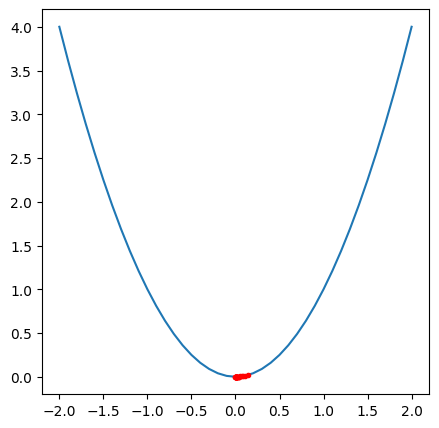

In [ ]:
# example of plotting a gradient descent search on a single-variable function
from numpy import asarray
from numpy import arange
from numpy.random import rand
from matplotlib import pyplot

# objective function
def objective(x):
    return x**2

# derivative of objective function
def derivative(x):
    return 2 * x

# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
    # track all solutions
    solutions, scores = list(), list()
    # generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # run the gradient descent
    for i in range(n_iter):
        # calculate gradient
        gradient = derivative(solution)
        # take a step
        solution = solution - step_size * gradient
        # evaluate candidate point
        solution_eval = objective(solution)
        # store solution
        solutions.append(solution)
        scores.append(solution_eval)
        # report progress
        print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    return [solutions, scores]

# define range for input
bounds = asarray([[-2.0, 2]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# perform the gradient descent search
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.figure(figsize=(5,5))
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

My observation: This code uses gradient descent to find the minimum of the function by adjusting the solution based on the gradient.
It plots a plot showing the function and the path taken by gradient descent
It moves towards the optimal solution, showing the points along the way.

Adapting the basic Gradient Descent algorithm, I modify it to use a variable step-size
𝛾
𝑖
γ
i
​
  instead of a fixed one. I experiment with different formulas for
𝛾
𝑖
γ
i
​
  and compare the performance—specifically, the rate of convergence—between the variable and fixed step-sizes. Additionally, I test the algorithm with various objective functions to assess how the choice of step-size influences the convergence behavior.




gradient descent with fixed step size for x^2:
>0 f([-0.88652246]) = 0.78592
>1 f([-0.70921797]) = 0.50299
>2 f([-0.56737437]) = 0.32191
>3 f([-0.4538995]) = 0.20602
>4 f([-0.3631196]) = 0.13186
>5 f([-0.29049568]) = 0.08439
>6 f([-0.23239654]) = 0.05401
>7 f([-0.18591723]) = 0.03457
>8 f([-0.14873379]) = 0.02212
>9 f([-0.11898703]) = 0.01416
>10 f([-0.09518962]) = 0.00906
>11 f([-0.0761517]) = 0.00580
>12 f([-0.06092136]) = 0.00371
>13 f([-0.04873709]) = 0.00238
>14 f([-0.03898967]) = 0.00152
>15 f([-0.03119174]) = 0.00097
>16 f([-0.02495339]) = 0.00062
>17 f([-0.01996271]) = 0.00040
>18 f([-0.01597017]) = 0.00026
>19 f([-0.01277614]) = 0.00016
>20 f([-0.01022091]) = 0.00010
>21 f([-0.00817673]) = 0.00007
>22 f([-0.00654138]) = 0.00004
>23 f([-0.0052331]) = 0.00003
>24 f([-0.00418648]) = 0.00002
>25 f([-0.00334919]) = 0.00001
>26 f([-0.00267935]) = 0.00001
>27 f([-0.00214348]) = 0.00000
>28 f([-0.00171478]) = 0.00000
>29 f([-0.00137183]) = 0.00000

gradient descent with inverse step 

<ipython-input-296-64107f3729eb>:48: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>%d f(%s) = %.5f' % (i, solution, solution_eval))


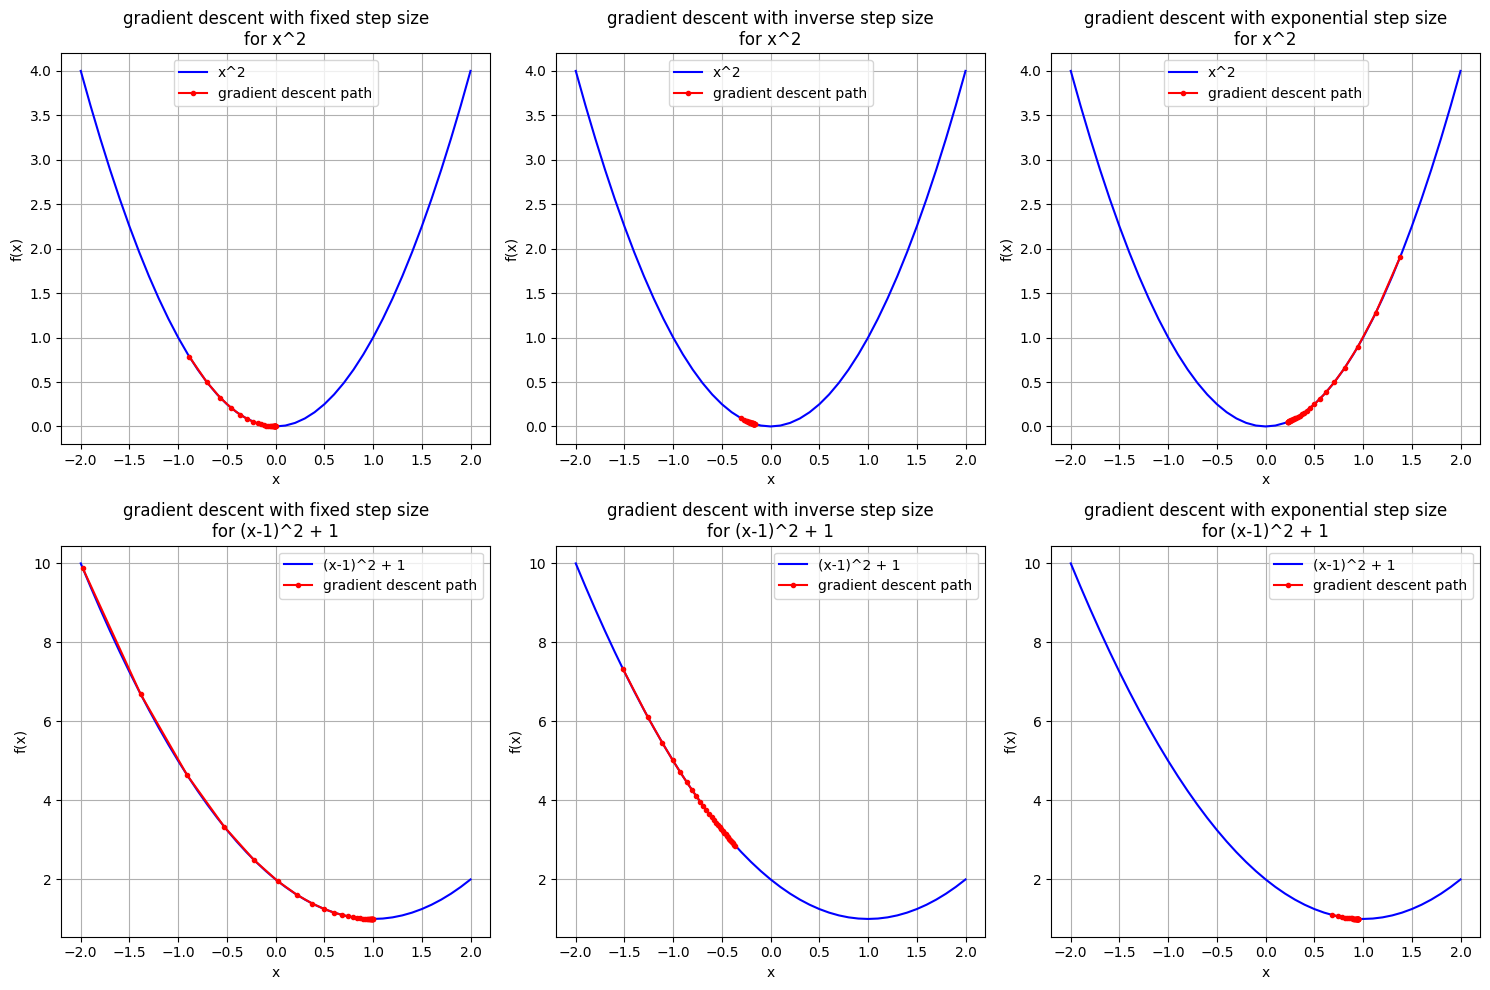

In [ ]:
def objective1(x):
    return x**2
def objective2(x):
    return (x - 1)**2 + 1
def derivative1(x):
    return 2 * x # taking derivative of the first obj fn
def derivative2(x):
    return 2 * (x - 1)  # taking derivative of the second obj fn

def gradient_descent(objective, derivative, bounds, n_iter, step_size):
    solutions, scores = list(), list()
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    for i in range(n_iter):
        gradient = derivative(solution)
        solution = solution - step_size * gradient
        solution_eval = objective(solution)
        solutions.append(solution)
        scores.append(solution_eval)
        print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    return [solutions, scores]

bounds = asarray([[-2.0, 2]])
n_iter = 30

stepsize = {
    'fixed': lambda i: 0.1,
    'inverse': lambda i: 0.1 / (1 + i),
    'exponential': lambda i: 0.1 * (0.9 ** i)
}
results = {}
for obj_func, deriv_func, obj_name in [
    (objective1, derivative1, 'x^2'),
    (objective2, derivative2, '(x-1)^2 + 1')
]:
    for stepsizetype, step_size in stepsize.items():
        print(f"\ngradient descent with {stepsizetype} step size for {obj_name}:")
        solutions, scores = [], []
        for i in range(n_iter):
            thestepsize = step_size(i) if callable(step_size) else step_size
            if i == 0:
                solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
            else:
                gradient = deriv_func(solution)
                solution = solution - thestepsize * gradient
            solution_eval = obj_func(solution)
            solutions.append(solution)
            scores.append(solution_eval)
            print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
        results[(obj_name, stepsizetype)] = (solutions, scores)

inputs = arange(bounds[0, 0], bounds[0, 1] + 0.1, 0.1)
plt.figure(figsize=(15, 10))
for idx, (obj_name, stepsizetype) in enumerate(results.keys()):
    plt.subplot(2, 3, idx + 1)
    solutions, scores = results[(obj_name, stepsizetype)]
    if obj_name == 'x^2':
        results_objective = objective1(inputs)
    else:
        results_objective = objective2(inputs)

    plt.plot(inputs, results_objective, label=f'{obj_name}', color='blue')
    plt.plot(solutions, scores, '.-', label='gradient descent path', color='red')
    plt.title(f'gradient descent with {stepsizetype} step size\nfor {obj_name}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid()
plt.tight_layout()
plt.show()

### Gradient descent - local vs. global minima

<ipython-input-297-f24d654680e4>:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>%d f(%s) = %.5f' % (i, solution, solution_eval))


>0 f([1.56040412]) = -5.37130
>1 f([1.38898055]) = -5.38398
>2 f([1.52827927]) = -5.41563
>3 f([1.42310012]) = -5.42246
>4 f([1.50874733]) = -5.43240
>5 f([1.44198941]) = -5.43570
>6 f([1.49623021]) = -5.43925
>7 f([1.45336725]) = -5.44076
>8 f([1.48809573]) = -5.44212
>9 f([1.46045943]) = -5.44279
>10 f([1.48279702]) = -5.44332
>11 f([1.46495203]) = -5.44361
>12 f([1.47934935]) = -5.44383
>13 f([1.4678215]) = -5.44395
>14 f([1.47711016]) = -5.44404
>15 f([1.46966255]) = -5.44409
>16 f([1.47565822]) = -5.44413
>17 f([1.47084683]) = -5.44415
>18 f([1.47471793]) = -5.44417
>19 f([1.4716098]) = -5.44417
>20 f([1.47410953]) = -5.44418
>21 f([1.4721018]) = -5.44418
>22 f([1.47371611]) = -5.44419
>23 f([1.47241925]) = -5.44419
>24 f([1.47346181]) = -5.44419
>25 f([1.47262415]) = -5.44419
>26 f([1.47329749]) = -5.44419
>27 f([1.47275643]) = -5.44419
>28 f([1.47319132]) = -5.44419
>29 f([1.47284185]) = -5.44419
>0 f([-1.28823792]) = -2.59586
>1 f([-1.35680943]) = -2.61789
>2 f([-1.34541783]) =

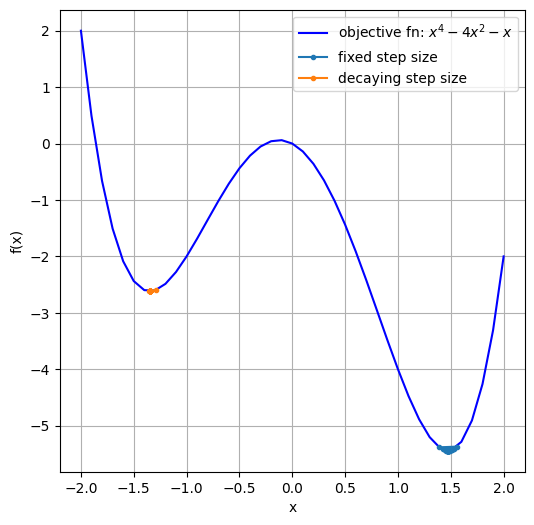

In [ ]:
# Objective function
def objective(x):
    return x**4 - 4*x**2 - x

# Derivative of the objective function
def derivative(x):
    return 4*x**3 - 8*x - 1

# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size_func):
    # Track all solutions
    solutions, scores = list(), list()
    # Generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # Run the gradient descent
    for i in range(n_iter):
        # Calculate gradient
        gradient = derivative(solution)
        # Take a step
        step_size = step_size_func(i)
        solution = solution - step_size * gradient
        # Evaluate candidate point
        solution_eval = objective(solution)
        # Store solution
        solutions.append(solution)
        scores.append(solution_eval)
        # Report progress
        print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    return [solutions, scores]
def fixedstepsize(i):
    return 0.1
def decayistepsize(i):
    return 0.1 / (1 + 0.1 * i)
def adaptive_step_size(i, gradient):
    return 0.1 / (1 + np.abs(gradient))
bounds = asarray([[-2.0, 2.0]])
n_iter = 30
results = {}
methods = {
    "fixed step size": fixedstepsize,
    "decaying step size": decayistepsize,
}
for method_name, step_size_func in methods.items():
    solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size_func)
    results[method_name] = (solutions, scores)

inputs = arange(bounds[0, 0], bounds[0, 1] + 0.1, 0.1)
results_obj = objective(inputs)
plt.figure(figsize=(6, 6))
plt.plot(inputs, results_obj, label='objective fn: $x^4 - 4x^2 - x$', color='blue')
for method_name, (solutions, scores) in results.items():
    plt.plot(solutions, scores, '.-', label=method_name)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

Here ,I modified the gradient descent algorithm to use variable step sizes, including fixed, decaying. I then applied these methods to the objective function ( y = x^4 - 4x^2 - x )comparing their convergence behaviors and assessing their effectiveness in finding local minima.

### Gradient descent with momentum

Momentum - weight by previous points, allows the search to build inertia in a direction in the search space, can overcome the oscillations of noisy gradients and navigate flat spots

<ipython-input-298-6493dd02262c>:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>%d f(%s) = %.5f' % (i, solution, solution_eval))


>0 f([0.12014933]) = 0.01444
>1 f([0.08710826]) = 0.00759
>2 f([0.05977429]) = 0.00357
>3 f([0.03961924]) = 0.00157
>4 f([0.02564888]) = 0.00066
>5 f([0.01632799]) = 0.00027
>6 f([0.01026613]) = 0.00011
>7 f([0.00639434]) = 0.00004
>8 f([0.00395394]) = 0.00002
>9 f([0.00243103]) = 0.00001
>10 f([0.00148795]) = 0.00000
>11 f([0.00090744]) = 0.00000
>12 f([0.0005518]) = 0.00000
>13 f([0.00033474]) = 0.00000
>14 f([0.00020268]) = 0.00000
>15 f([0.00012252]) = 0.00000
>16 f([7.39730863e-05]) = 0.00000
>17 f([4.46130184e-05]) = 0.00000
>18 f([2.68823944e-05]) = 0.00000
>19 f([1.61867283e-05]) = 0.00000
>20 f([9.74068281e-06]) = 0.00000
>21 f([5.8587326e-06]) = 0.00000
>22 f([3.52240102e-06]) = 0.00000
>23 f([2.11702134e-06]) = 0.00000
>24 f([1.27200317e-06]) = 0.00000
>25 f([7.64097083e-07]) = 0.00000
>26 f([4.58905841e-07]) = 0.00000
>27 f([2.755673e-07]) = 0.00000
>28 f([1.65452278e-07]) = 0.00000
>29 f([9.93273156e-08]) = 0.00000


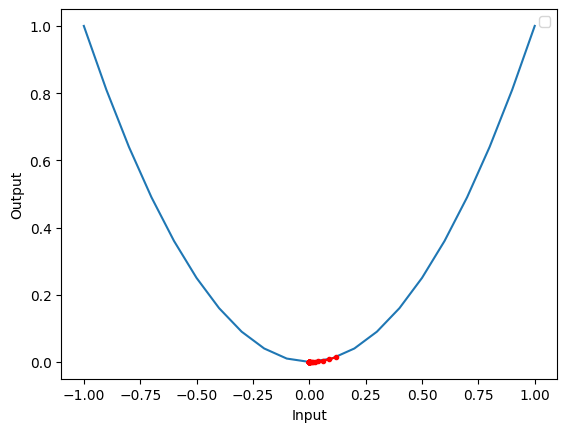

In [ ]:
# Objective function
def objective(x):
    return x**2.0

# Derivative of the objective function
def derivative(x):
    return 2.0 * x

# Gradient descent algorithm with momentum
def gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum):
    # Track all solutions
    solutions, scores = list(), list()
    # Generate an initial point
    solution = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # Keep track of the change
    change = 0.0
    # Run the gradient descent
    for i in range(n_iter):
        # Calculate gradient
        gradient = derivative(solution)
        # Calculate update
        new_change = step_size * gradient + momentum * change
        # Take a step
        solution = solution - new_change
        # Save the change
        change = new_change
        # Evaluate candidate point
        solution_eval = objective(solution)
        # Store solution
        solutions.append(solution)
        scores.append(solution_eval)
        # Report progress
        print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    return [solutions, scores]

# Define range for input
bounds = np.asarray([[-1.0, 1.0]])
# Define the total iterations
n_iter = 30
# Define the step size
step_size = 0.1
# Define momentum
momentum = 0.3
# Perform the gradient descent search with momentum
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum)
# Sample input range uniformly at 0.1 increments
inputs = np.arange(bounds[0, 0], bounds[0, 1] + 0.1, 0.1)
# Compute targets
results = objective(inputs)
# Create a line plot of input vs result
plt.plot(inputs, results)
# Plot the solutions found
plt.plot(solutions, scores, '.-', color='red')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

momentum = 0.3

>0 f([1.07932225]) = -0.06520
>1 f([0.70436188]) = 0.40056
>2 f([0.51682682]) = 0.66619
>3 f([0.47632378]) = 0.71652
>4 f([0.55997294]) = 0.60917
>5 f([0.77108647]) = 0.30048
>6 f([1.11029095]) = -0.08179
>7 f([1.45997428]) = 0.29990
>8 f([1.46135299]) = 0.30424
>9 f([1.14721175]) = -0.09383
>10 f([0.88481965]) = 0.13731
>11 f([0.78341026]) = 0.28213
>12 f([0.84062189]) = 0.19868
>13 f([1.03462172]) = -0.03210
>14 f([1.29427748]) = -0.03713
>15 f([1.42212368]) = 0.19166
>16 f([1.27787921]) = -0.05311
>17 f([1.05882955]) = -0.05128
>18 f([0.93495677]) = 0.07270
>19 f([0.94579107]) = 0.05962
>20 f([1.07464448]) = -0.06222
>21 f([1.25557378]) = -0.07059
>22 f([1.35071706]) = 0.03983
>23 f([1.26810135]) = -0.06137
>24 f([1.1141079]) = -0.08344
>25 f([1.01755779]) = -0.01692
>26 f([1.02335995]) = -0.02223
>27 f([1.11874171]) = -0.08532
>28 f([1.24372928]) = -0.07796
>29 f([1.29947143]) = -0.03149


<ipython-input-299-a220e49b8d02>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>%d f(%s) = %.5f' % (i, solution, solution_eval))


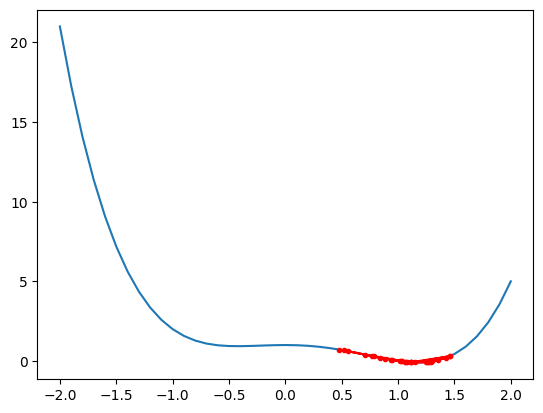

In [ ]:
# example of plotting gradient descent with momentum for a single-variable function
# objective function
def objective(x):
    return x**4-x**3-x**2+1

# derivative of objective function
def derivative(x):
    return 4*x ** 3-3*x**2-2*x

# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum):
    # track all solutions
    solutions, scores = list(), list()
    # generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # keep track of the change
    change = 0.0
    # run the gradient descent
    for i in range(n_iter):
        # calculate gradient
        gradient = derivative(solution)
        # calculate update
        new_change = step_size * gradient + momentum * change
        # take a step
        solution = solution - new_change
        # save the change
        change = new_change
        # evaluate candidate point
        solution_eval = objective(solution)
        # store solution
        solutions.append(solution)
        scores.append(solution_eval)
        # report progress
        print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    return [solutions, scores]

# define range for input
bounds = asarray([[-2.0, 2.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# define momentum
momentum = 0.9
# perform the gradient descent search with momentum
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

i used momentum = 0.9 here

Adapting the code, I use momentum values of 0.1, 0.3, 0.7, and 0.9 to test the behavior of the Gradient Descent algorithm with the objective function
𝑓
(
𝑥
)
=
𝑥
4
−
𝑥
3
−
𝑥
2
+
1
f(x)=x
4
 −x
3
 −x
2
 +1. I compare the results for each momentum value, paying particular attention to the convergence behavior. I analyze any differences in the rate of convergence and check whether the algorithm converges to the global minimum, providing an explanation for the observed results.

momentum: 0.1, final x: -0.425390529679106, f(x): 0.9287658080756773
momentum: 0.3, final x: -0.42539052967910607, f(x): 0.9287658080756773
momentum: 0.7, final x: 1.175390529679106, f(x): -0.09673455807567732
momentum: 0.9, final x: 1.175390529679106, f(x): -0.09673455807567732


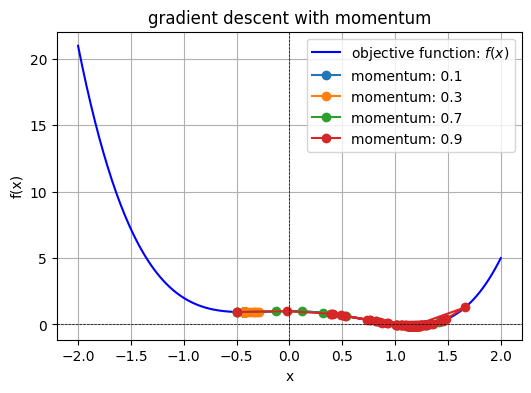

In [ ]:
# Objective function
def f(x):
    return x**4 - x**3 - x**2 + 1

# Derivative of the objective function
def df(x):
    return 4*x**3 - 3*x**2 - 2*x

# Gradient descent with momentum
def mom_gd(initx, alpha, beta, iterations):
    x = initx
    v = 0
    x_history = []
    for _ in range(iterations):
        gradient = df(x)
        v = beta * v + alpha * gradient
        x = x - v
        x_history.append(x)
    return x, f(x), x_history

initx = -1
alpha = 0.1
iterations = 1000
momentum_values = [0.1, 0.3, 0.7, 0.9]
results = {}
for beta in momentum_values:
    final_x, final_f, x_history = mom_gd(initx, alpha, beta, iterations)
    results[beta] = (final_x, final_f, x_history)
for beta, (final_x, final_f, _) in results.items():
    print(f"momentum: {beta}, final x: {final_x}, f(x): {final_f}")
x_values = np.linspace(-2, 2, 400)
y_values = f(x_values)

plt.figure(figsize=(6,4))
plt.plot(x_values, y_values, label='objective function: $f(x)$', color='blue')
for beta, (final_x, final_f, x_history) in results.items():
    plt.plot(x_history, f(np.array(x_history)), 'o-', label=f'momentum: {beta}')
plt.title('gradient descent with momentum')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.legend()
plt.grid()
plt.show()



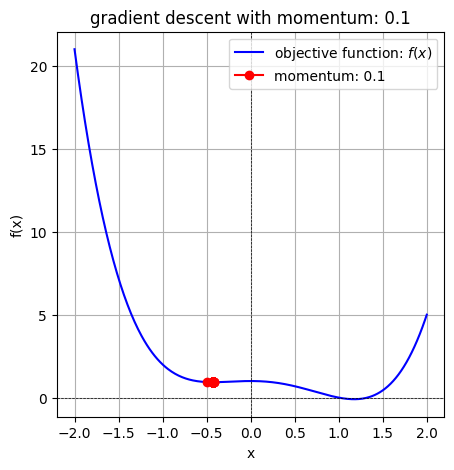

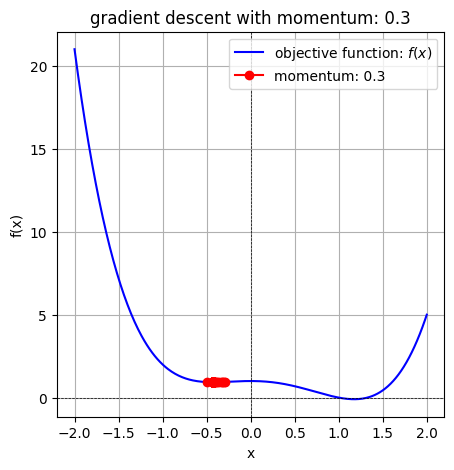

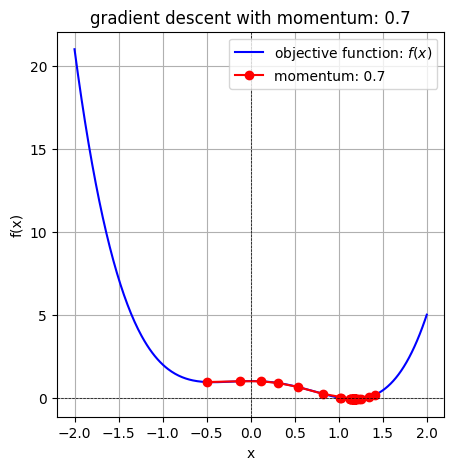

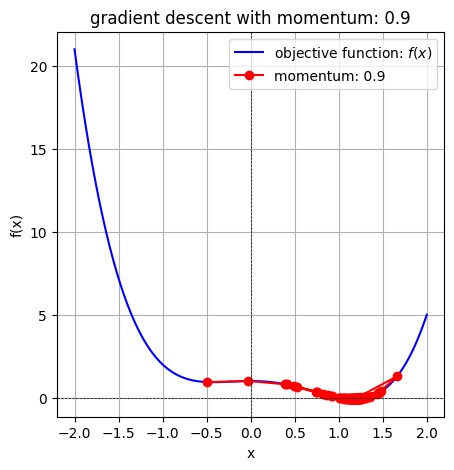

In [ ]:
def f(x):
    return x**4 - x**3 - x**2 + 1
x_values = np.linspace(-2, 2, 400)
y_values = f(x_values)
for beta, (final_x, final_f, x_history) in results.items():
    plt.figure(figsize=(5, 5))
    plt.plot(x_values, y_values, label='objective function: $f(x)$', color='blue')
    plt.plot(x_history, f(np.array(x_history)), 'o-', label=f'momentum: {beta}',color='red')
    plt.title(f'gradient descent with momentum: {beta}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')
    plt.legend()
    plt.grid()
    plt.show()

I implemented gradient descent with different momentum values (0.1, 0.3, 0.7, and 0.9) to optimize the given function. My observation is that lower momentum values cause slower convergence and more oscillation, while higher values lead to faster convergence.This shows the importance of choosing an appropriate momentum value .


Here's how you could rephrase Task 3 in an ongoing, adapting style:

Adapting the Gradient Descent with Momentum algorithm, I test it with the objective function
𝑓
(
𝑥
)
=
𝑥
4
−
4
𝑥
2
−
𝑥
f(x)=x
4
 −4x
2
 −x. My goal is to find suitable values for the step-size and momentum that reliably lead to convergence toward the global minimum. I experiment with different combinations of step-size and momentum, analyzing the results to determine if they converge effectively. If successful, I will explain why these particular choices work well. If not, I will identify the obstacles encountered during the process and discuss why these challenges may be difficult to overcome.

Momentum: 0.1, Final x: 1.4729976011140298, f(x): -5.444192066610897
Momentum: 0.3, Final x: 1.47299760111403, f(x): -5.444192066610897
Momentum: 0.7, Final x: 1.4729976011140302, f(x): -5.4441920666108965
Momentum: 0.8, Final x: 1.4729976011140302, f(x): -5.4441920666108965
Momentum: 0.9, Final x: 1.47299760111403, f(x): -5.444192066610897


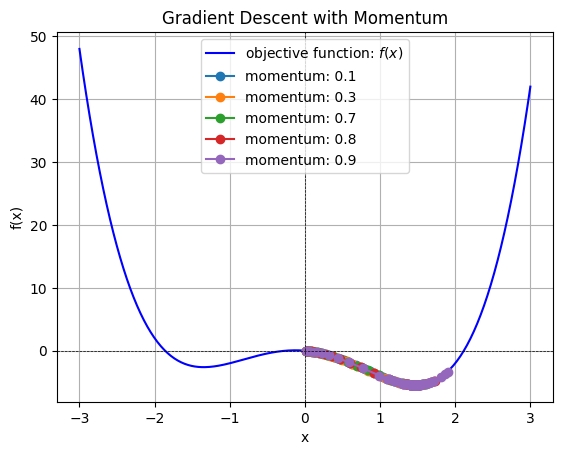

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function
def f(x):
    return x**4 - 4*x**2 - x

# Derivative of the objective function
def df(x):
    return 4*x**3 - 8*x - 1

# Gradient descent with momentum
def mom_gd(initx, alpha, beta, iterations):
    x = initx
    v = 0
    x_history = []
    for _ in range(iterations):
        gradient = df(x)
        v = beta * v + alpha * gradient
        x = x - v
        x_history.append(x)
    return x, f(x), x_history

initx = 0
alpha = 0.01
iterations = 1000
momentum_values = [0.1, 0.3, 0.7,0.8, 0.9]
results_momentum = {}

for beta in momentum_values:
    final_x, final_f, x_history = mom_gd(initx, alpha, beta, iterations)
    results_momentum[beta] = (final_x, final_f, x_history)
for beta, (final_x, final_f, _) in results_momentum.items():
    print(f"Momentum: {beta}, Final x: {final_x}, f(x): {final_f}")
x_values = np.linspace(-3, 3, 400)
y_values = f(x_values)

plt.plot(x_values, y_values, label='objective function: $f(x)$', color='blue')
for beta, (final_x, final_f, x_history) in results_momentum.items():
    plt.plot(x_history, f(np.array(x_history)), 'o-', label=f'momentum: {beta}')
plt.title('Gradient Descent with Momentum')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.legend()
plt.grid()
plt.show()

Here , I implemented the gradient descent algorithm with momentum to optimize the objective the function ( f(x) = x^4 - 4x^2 - x ). I tested various step sizes and momentum values to find the combinations that converge towards the global minimum, to analyze their effectiveness in getting faster and more stable convergence.

 Yes ,choosing values for the step size (alpha = 0.01) and momentum (beta = 0.7 or 0.9) can help the algorithm effectively reach the global minimum.

 They work well because they ensure smooth updates and help the algorithm stay on the right path.

### Gradient descent for functions of two variables


Defining
𝛿
𝑤
δ
w
​
  in the code below for gradient descent in the two-variable case.

In [ ]:
# max_iterations.
def gradient_descent(max_iterations, threshold, w_init, obj_func, grad_func, extra_param,
                     learning_rate=0.05, momentum=0.8):
    w = w_init
    w_history = w.reshape(1, -1)
    f_history = np.array([])
    delta_w = np.zeros(w.shape)
    i = 0
    diff = 1.0e10
    f_history = np.append(f_history, obj_func(w, extra_param))

    while i < max_iterations and diff > threshold:
        gradient = grad_func(w, extra_param)
        delta_w = -learning_rate * gradient
        w = w + delta_w
        w_history = np.vstack((w_history, w))
        f_history = np.append(f_history, obj_func(w, extra_param))
        i += 1
        diff = np.abs(f_history[-1] - f_history[-2]) if len(f_history) > 1 else 1.0e10
    return w_history, f_history

Objective function $f(x,y)=x^2+y^2$

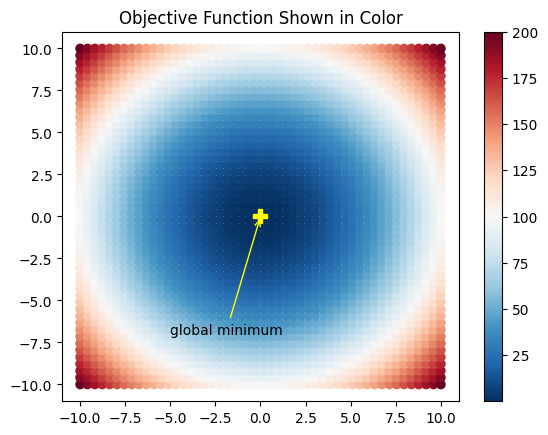

In [ ]:
def visualize_fw():
    xcoord = np.linspace(-10.0,10.0,50)
    ycoord = np.linspace(-10.0,10.0,50)
    w1,w2 = np.meshgrid(xcoord,ycoord)
    pts = np.vstack((w1.flatten(),w2.flatten()))

    # All 2D points on the grid
    pts = pts.transpose()

    # Function value at each point
    f_vals = np.sum(pts*pts,axis=1)
    function_plot(pts,f_vals)
    plt.title('Objective Function Shown in Color')
    plt.show()
    return pts,f_vals

# Helper function to annotate a single point
def annotate_pt(text,xy,xytext,color):
    plt.plot(xy[0],xy[1],marker='P',markersize=10,c=color)
    plt.annotate(text,xy=xy,xytext=xytext,
                 # color=color,
                 arrowprops=dict(arrowstyle="->",
                 color = color,
                 connectionstyle='arc3'))

# Plot the function
# Pts are 2D points and f_val is the corresponding function value
def function_plot(pts,f_val):
    f_plot = plt.scatter(pts[:,0],pts[:,1],
                         c=f_val,vmin=min(f_val),vmax=max(f_val),
                         cmap='RdBu_r')
    plt.colorbar(f_plot)
    # Show the optimal point
    annotate_pt('global minimum',(0,0),(-5,-7),'yellow')

pts,f_vals = visualize_fw()

here i observe that this code visualizes the behavior of a simple quadratic objective function in two dimensions , it highlights the global minimum

In [ ]:
# Objective function
def f(w,extra=[]):
    return np.sum(w*w)

# Function to compute the gradient
def grad(w,extra=[]):
    return 2*w

# Function to plot the objective function
# and learning history annotated by arrows
# to show how learning proceeded
def visualize_learning(w_history):

    # Make the function plot
    function_plot(pts,f_vals)

    # Plot the history
    plt.plot(w_history[:,0],w_history[:,1],marker='o',c='magenta')

    # Annotate the point found at last iteration
    annotate_pt('minimum found',
                (w_history[-1,0],w_history[-1,1]),
                (-1,7),'green')
    iter = w_history.shape[0]
    for w,i in zip(w_history,range(iter-1)):
        # Annotate with arrows to show history
        plt.annotate("",
                    xy=w, xycoords='data',
                    xytext=w_history[i+1,:], textcoords='data',
                    arrowprops=dict(arrowstyle='<-',
                            connectionstyle='angle3'))

def solve_fw():
    # Setting up
    rand = np.random.RandomState(19)
    w_init = rand.uniform(-10,10,2)
    fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(18, 12))
    learning_rates = [0.05,0.2,0.5,0.8]
    momentum = [0,0.5,0.9]
    ind = 1

    # Iteration through all possible parameter combinations
    for alpha in momentum:
        for eta,col in zip(learning_rates,[0,1,2,3]):
            plt.subplot(3,4,ind)
            w_history,f_history = gradient_descent(5,-1,w_init, f,grad,[],eta,alpha)

            visualize_learning(w_history)
            ind = ind+1
            plt.text(-9, 12,'Learning Rate = '+str(eta),fontsize=13)
            if col==1:
                plt.text(10,15,'momentum = ' + str(alpha),fontsize=20)

    fig.subplots_adjust(hspace=0.5, wspace=.3)
    plt.show()

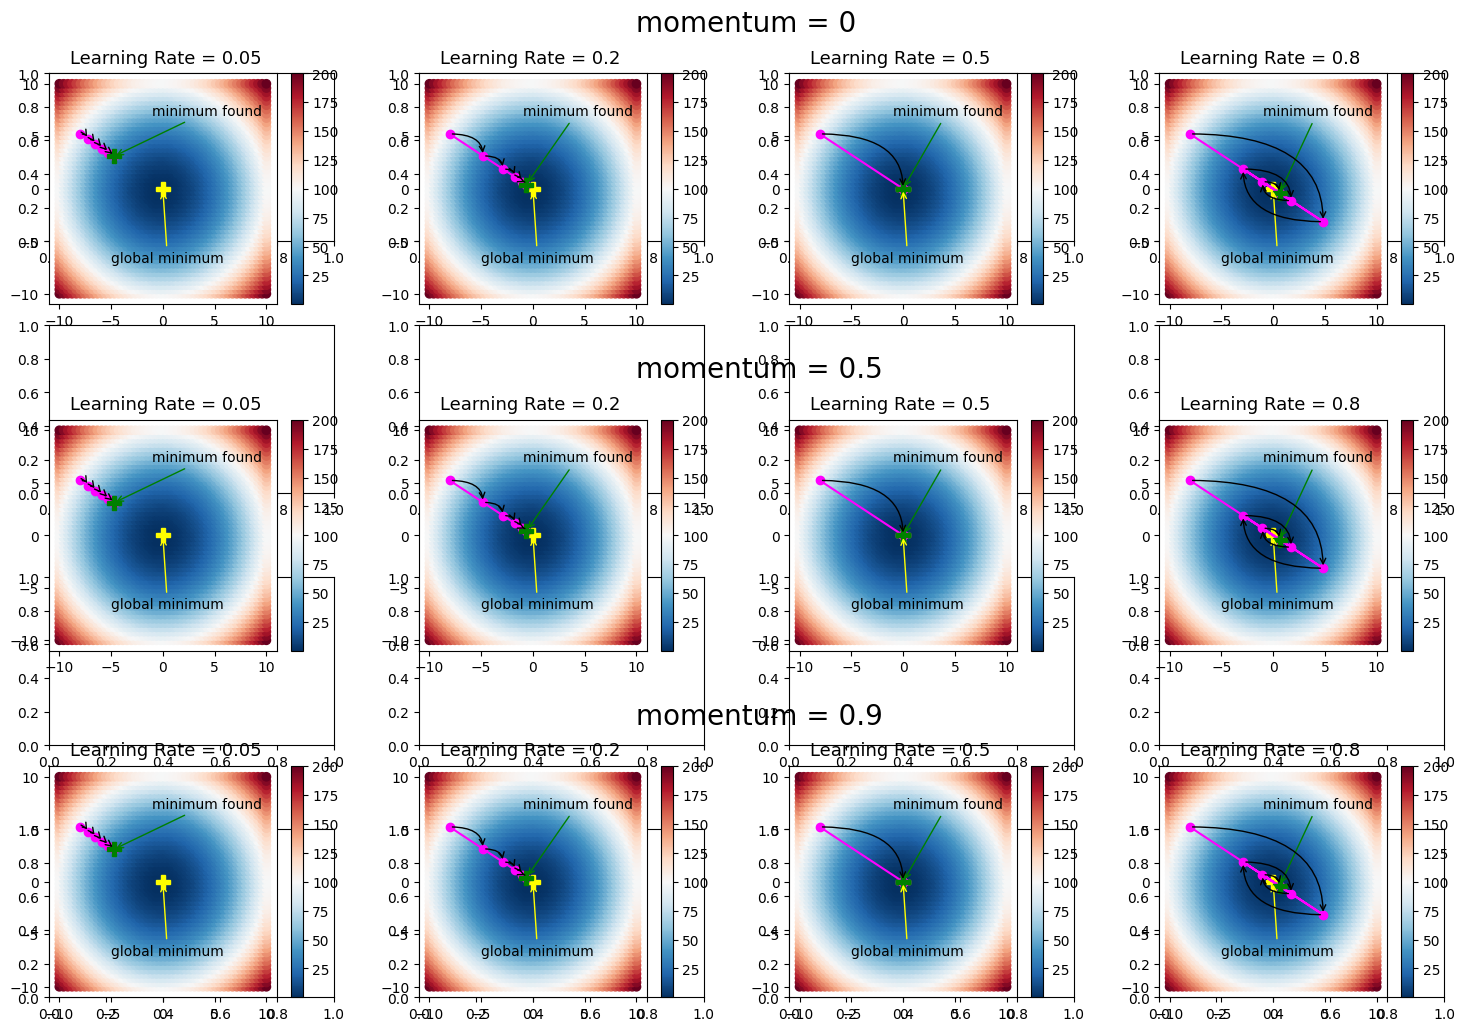

In [ ]:
solve_fw()

.

.

.

.


.

.


.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


.


.

.

.

.

.

.

.